<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  Lung Cancer Prediction  -</p>    
<p>
    
               
### <center>📈『XGBClassifier Optuna』👍:Lung Cancer Prediction </center>
### <center>If you feel my notebook helpful, support with one upvote, thank you</center>
### <center>Created by Mr.Tao  16/11/2023👍</center>

<div style="border-radius:10px; border:#B7B7A4 solid; padding:15px; background-color:#F0EFEB; font-size:110%; text-align:left">
    
 <h1 style="display: inline-block; padding: 7px; background-color: #000000; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">About Dataset</h1>    

<div style="font-size: 140%; color: #283618; margin-top: 20px; font-weight: bold;">About this dataset</div>

<p style="font-size: 110%; color: #283618; margin-top: 10px;">
This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring
</p>

<div style="font-size: 140%; color: #283618; margin-top: 20px; font-weight: bold;">How to use the dataset</div>

<p style="font-size: 110%; color: #283618; margin-top: 10px;">
Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

The study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

The researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. They also found that the risk was higher in nonsmokers than smokers, and that the risk increased with age.

While this study does not prove that air pollution causes lung cancer, it does suggest that there may be a link between the two. More research is needed to confirm these findings and to determine what effect different types and levels of air pollution may have on lung cancer risk
</p>

<div style="font-size: 140%; color: #283618; margin-top: 20px; font-weight: bold;">Research Ideas</div>

<p style="font-size: 110%; color: #283618; margin-top: 10px;">
    
- [1. predicting the likelihood of a patient developing lung cancer](#8) 

- [2. identifying risk factors for lung cancer](#9)
    
- [3. determining the most effective treatment for a patient with lung cance](#10)    
</p>

</div>




<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <h1 style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-Table of Contents   -</h1>    
<p>
    
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. EDA](#3)
- [4. Optuna](#4)
- [5. Predict](#5)

<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import pandas as pd
import numpy as np
import base64
import seaborn as sns
import os
import random
import gc

import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score,confusion_matrix
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
pd.set_option("display.max_columns", None)
import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Read Dataset</h1>**

In [2]:
train = pd.read_csv('/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')
train, test = train_test_split(train, test_size=0.2, random_state=42)
display(train.head())
display(test.head())

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
29,29,P124,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,Medium
535,535,P580,53,1,6,8,7,7,6,7,7,3,8,7,9,6,5,2,5,2,3,2,1,7,6,High
695,695,P724,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,Medium
557,557,P60,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,Medium
836,836,P851,38,1,2,3,5,2,1,1,1,1,4,3,2,4,2,1,3,4,6,1,3,2,2,Low


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
521,521,P568,48,2,1,6,7,8,7,6,7,7,3,4,8,7,3,2,6,4,2,3,1,2,1,Medium
737,737,P762,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,Medium
740,740,P765,22,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,Medium
660,660,P693,37,2,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
411,411,P469,46,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,Medium


<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">EDA</h1>**

### <span style="font-size:28px;">Process and Methods of Exploratory Data Analysis</span>

### <span style="font-size:20px;">1.Check for Missing Values</span>

### <span style="font-size:20px;">2.View Column Data Types</span>

### <span style="font-size:20px;">3.Calculate Skewness and Kurtosis</span>

### <span style="font-size:20px;">4.Calculate the Correlation Matrix and Visualize the Heatmap</span>

### <span style="font-size:20px;">5.Add new columns</span>

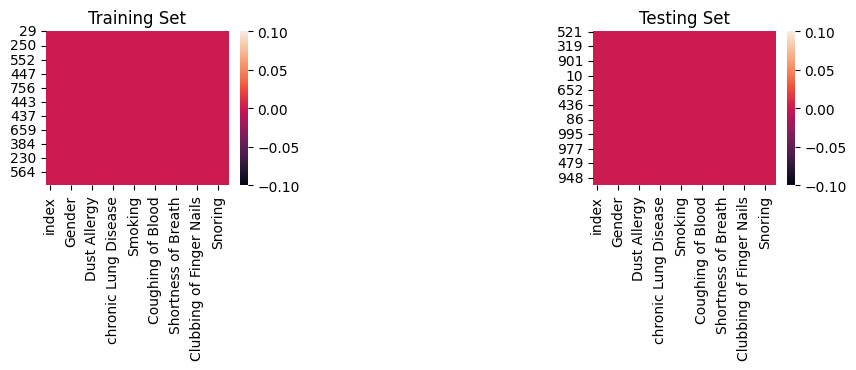

In [3]:
#Check for Missing Values
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

In [4]:
#View Column Data Types
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     800 non-null    int64 
 1   Patient Id                800 non-null    object
 2   Age                       800 non-null    int64 
 3   Gender                    800 non-null    int64 
 4   Air Pollution             800 non-null    int64 
 5   Alcohol use               800 non-null    int64 
 6   Dust Allergy              800 non-null    int64 
 7   OccuPational Hazards      800 non-null    int64 
 8   Genetic Risk              800 non-null    int64 
 9   chronic Lung Disease      800 non-null    int64 
 10  Balanced Diet             800 non-null    int64 
 11  Obesity                   800 non-null    int64 
 12  Smoking                   800 non-null    int64 
 13  Passive Smoker            800 non-null    int64 
 14  Chest Pain              

None

test
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     200 non-null    int64 
 1   Patient Id                200 non-null    object
 2   Age                       200 non-null    int64 
 3   Gender                    200 non-null    int64 
 4   Air Pollution             200 non-null    int64 
 5   Alcohol use               200 non-null    int64 
 6   Dust Allergy              200 non-null    int64 
 7   OccuPational Hazards      200 non-null    int64 
 8   Genetic Risk              200 non-null    int64 
 9   chronic Lung Disease      200 non-null    int64 
 10  Balanced Diet             200 non-null    int64 
 11  Obesity                   200 non-null    int64 
 12  Smoking                   200 non-null    int64 
 13  Passive Smoker            200 non-null    int64 
 14  Chest Pain               

None

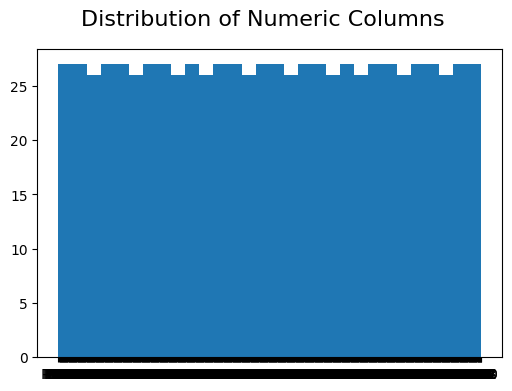

In [5]:
# Plot a histogram for a specific numeric column 'Patient Id'
train['Patient Id'].hist(bins=30, figsize=(6, 4), grid=False)

# Add a title for the plot
plt.suptitle('Distribution of Numeric Columns', fontsize=16)

# Display the plot
plt.show()

In [6]:
train=train.drop(columns=['Patient Id'],axis=1)#drop
test=test.drop(columns=['Patient Id'],axis=1)#drop

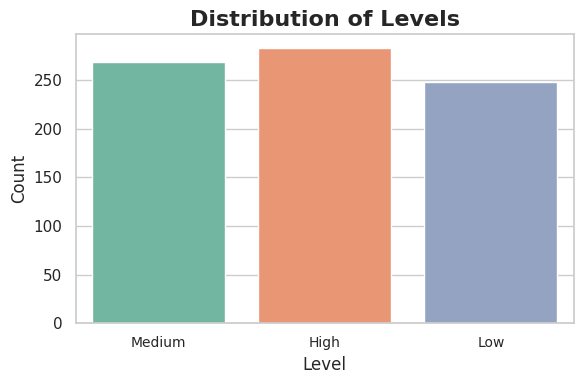

Level
High      283
Medium    269
Low       248
Name: count, dtype: int64


In [7]:
# Set plot style for a cleaner look
sns.set(style="whitegrid")

# Plot the value counts of "Level" column
plt.figure(figsize=(6, 4))  
sns.countplot(x=train["Level"], palette="Set2")  # Use a color palette

# Add titles and labels for better readability
plt.title('Distribution of Levels', fontsize=16, fontweight='bold')
plt.xlabel('Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, fontsize=10)

# Display the plot with tight layout to avoid clipping
plt.tight_layout()
plt.show()

# Print the value counts as well
print(train["Level"].value_counts())


In [8]:
train['Level'] = train['Level'] .replace({'Low':0,'Medium':1,'High':2})
test['Level'] = test['Level'] .replace({'Low':0,'Medium':1,'High':2})

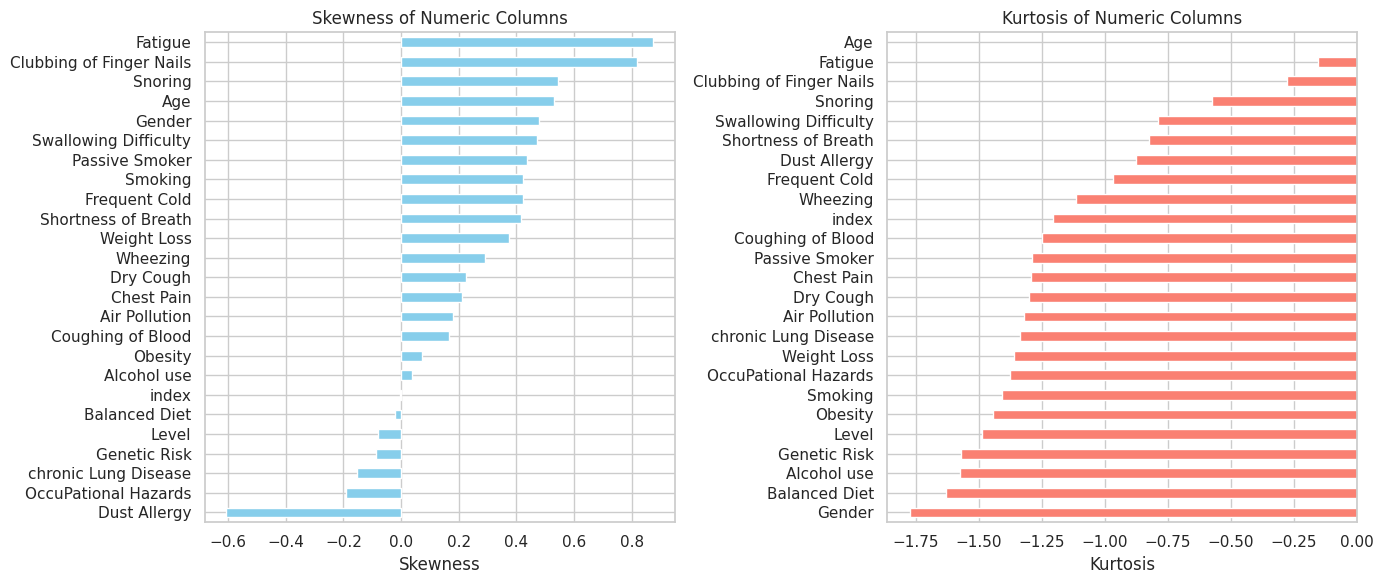

In [9]:
# Calculate Skewness and Kurtosis
numeric_df = train.select_dtypes(include=['number'])
skewness = numeric_df.skew()
kurtosis = numeric_df.kurtosis()

# Combine results into a DataFrame
result = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Plot Skewness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
result['Skewness'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Skewness of Numeric Columns')
plt.xlabel('Skewness')

# Plot Kurtosis
plt.subplot(1, 2, 2)
result['Kurtosis'].sort_values().plot(kind='barh', color='salmon')
plt.title('Kurtosis of Numeric Columns')
plt.xlabel('Kurtosis')

plt.tight_layout()
plt.show()


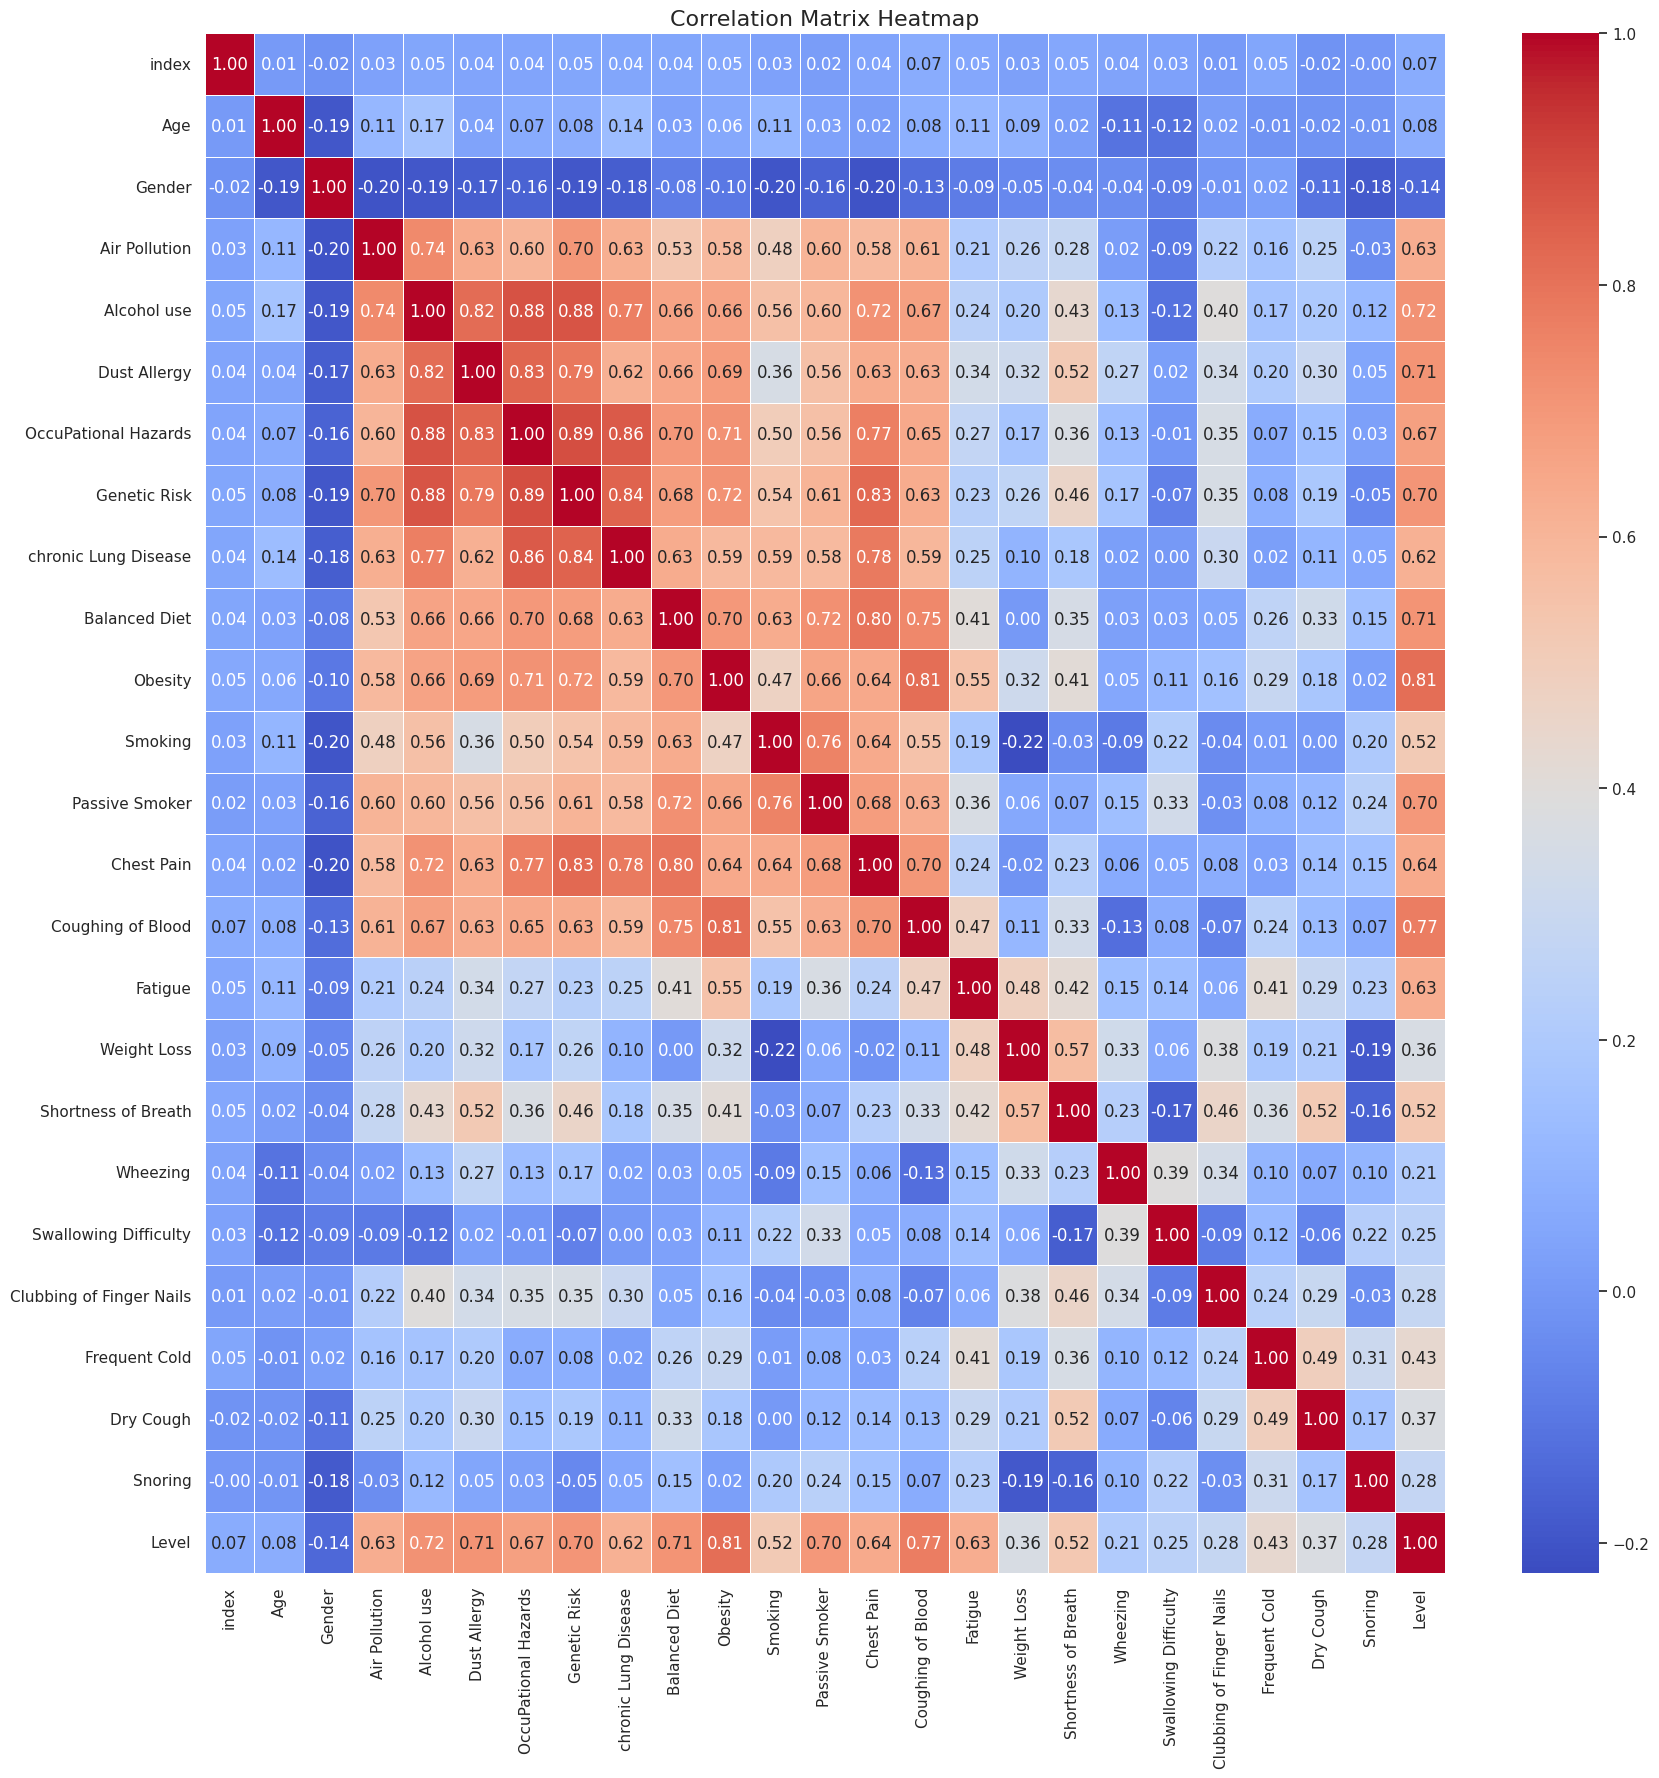

In [10]:
# Calculate the Correlation Matrix and Visualize the Heatmap
correlation_matrix = train.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()


### <span style="font-size:28px;">Based on the heatmap,here are some ideas for adding new columns to the dataset</span>

### <span style="font-size:20px;">1.Health Risk:</span>
- <span style="font-size:16px;">This column aggregates several health risk factors, such as Air Pollution, Alcohol use, Smoking, and Obesity, into a single index. This index provides a composite measure of overall health risk based on these variables.</span>

### <span style="font-size:20px;">2.Environmental Exposure Score:</span>
- <span style="font-size:16px;">This column combines environmental-related variables like Air Pollution, Dust Allergy, and OccuPational Hazards into a single score. This score reflects the degree of exposure to environmental factors affecting health..</span>

### <span style="font-size:20px;">3.Lifestyle Score:</span>
- <span style="font-size:16px;">This column aggregates lifestyle-related factors such as Alcohol use, Balanced Diet, and Smoking into a single score. This score assesses how lifestyle choices impact health.</span>

### <span style="font-size:20px;">4.Symptom Severity:</span>
- <span style="font-size:16px;">This column combines symptoms-related variables like Chest Pain, Coughing of Blood, Shortness of Breath, and Fatigue into a single severity score. This score helps assess the overall severity of symptoms experienced by individuals.</span>

### <span style="font-size:20px;">5.Risky Behavior Index:</span>
- <span style="font-size:16px;">This column aggregates risky behaviors such as Smoking, Alcohol use, and Passive Smoker into a single index. This index evaluates the level of engagement in risky behaviors.</span>


In [11]:
#Add new columns

# Health Risk 
train['Health Risk'] = train[['Air Pollution', 'Alcohol use', 'Smoking', 'Obesity']].mean(axis=1)

# Environmental Exposure Score
train['Environmental Exposure'] = train[['Air Pollution', 'Dust Allergy', 'OccuPational Hazards']].mean(axis=1)

# Lifestyle Score
train['Lifestyle Score'] = train[['Alcohol use', 'Balanced Diet', 'Smoking']].mean(axis=1)

# Symptom Severity
train['Symptom Severity'] = train[['Chest Pain', 'Coughing of Blood', 'Shortness of Breath', 'Fatigue']].mean(axis=1)

# Risky Behavior 
train['Risky Behavior'] = train[['Smoking', 'Alcohol use', 'Passive Smoker']].mean(axis=1)

# Print the updated DataFrame to check the new columns
train

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Health Risk,Environmental Exposure,Lifestyle Score,Symptom Severity,Risky Behavior
29,29,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,1,3.00,4.333333,5.000000,3.50,4.000000
535,535,53,1,6,8,7,7,6,7,7,3,8,7,9,6,5,2,5,2,3,2,1,7,6,2,6.25,6.666667,7.666667,6.25,7.666667
695,695,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,1,3.00,4.333333,5.000000,3.50,4.000000
557,557,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,1,4.75,6.666667,3.666667,3.75,3.666667
836,836,38,1,2,3,5,2,1,1,1,1,4,3,2,4,2,1,3,4,6,1,3,2,2,0,2.50,3.000000,2.666667,2.75,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,33,1,6,7,7,7,7,7,6,7,7,7,7,7,8,5,7,6,7,8,7,6,2,2,6.75,6.666667,6.666667,7.25,7.000000
270,270,24,2,1,2,2,3,2,4,2,3,2,1,1,1,1,1,1,2,3,4,5,2,1,0,2.00,2.000000,2.000000,1.00,1.666667
860,860,36,2,2,1,5,3,2,3,2,4,1,4,2,4,6,7,2,5,8,1,3,2,3,1,2.00,3.333333,1.333333,3.50,2.000000
435,435,49,1,6,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2,5.00,5.666667,4.333333,7.25,3.333333


In [12]:
#Add new columns

# Health Risk
test['Health Risk'] = test[['Air Pollution', 'Alcohol use', 'Smoking', 'Obesity']].mean(axis=1)

# Environmental Exposure Score
test['Environmental Exposure'] = test[['Air Pollution', 'Dust Allergy', 'OccuPational Hazards']].mean(axis=1)

# Lifestyle Score
test['Lifestyle Score'] = test[['Alcohol use', 'Balanced Diet', 'Smoking']].mean(axis=1)

# Symptom Severity
test['Symptom Severity'] = test[['Chest Pain', 'Coughing of Blood', 'Shortness of Breath', 'Fatigue']].mean(axis=1)

# Risky Behavior
test['Risky Behavior'] = test[['Smoking', 'Alcohol use', 'Passive Smoker']].mean(axis=1)

# Print the updated DataFrame to check the new columns
test

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Health Risk,Environmental Exposure,Lifestyle Score,Symptom Severity,Risky Behavior
521,521,48,2,1,6,7,8,7,6,7,7,3,4,8,7,3,2,6,4,2,3,1,2,1,1,4.25,5.333333,5.333333,6.00,4.333333
737,737,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,1,4.75,6.666667,3.666667,3.75,3.666667
740,740,22,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2,1,4.75,6.666667,3.666667,3.75,3.666667
660,660,37,2,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2,7.00,7.000000,7.000000,5.50,7.000000
411,411,46,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5,1,3.00,4.333333,5.000000,3.50,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,408,35,1,2,1,5,3,2,3,2,4,1,4,2,4,6,7,2,5,8,1,3,2,3,1,2.00,3.333333,1.333333,3.50,2.000000
332,332,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2,7.25,6.666667,7.666667,5.75,7.666667
208,208,28,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,2,6.75,6.666667,7.000000,5.25,7.333333
613,613,44,1,2,3,2,1,3,2,1,2,7,6,2,2,2,2,3,2,1,2,3,2,3,0,3.50,1.666667,3.666667,2.25,5.333333


In [13]:
X = train.drop(columns=['Level'],axis=1)#drop
y = train["Level"]

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Optuna</h1>**

In [14]:
#optuna

def objective(trial):
    params = {
        'random_seed':123,
        'n_estimators'    :trial.suggest_int('n_estimators', 300, 1000),
        'num_leaves'      :trial.suggest_int('num_leaves', 4, 32),
        'max_depth'       :trial.suggest_int("max_depth",1,10),
        'lambda'          : trial.suggest_loguniform("lambda", 1e-8, 1.0),
        'subsample'       : trial.suggest_float("subsample", 0.01, 1.0, step = 0.1),   
        'reg_lambda'      : trial.suggest_loguniform("lambda", 1e-8, 1.0),
        'reg_alpha'       : trial.suggest_loguniform("alpha", 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.1, 1.0, step = 0.1) } 
            
    model = xgb.XGBClassifier(**params)
    model.fit(X,y)
    y_pred = model.predict(X)
    score = accuracy_score(y, y_pred)
    
    return score

In [15]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=123))
study.optimize(objective, n_trials=50) 
study.best_params

{'n_estimators': 367,
 'num_leaves': 29,
 'max_depth': 7,
 'lambda': 0.0061281708618153696,
 'subsample': 0.01,
 'alpha': 0.0005694492634603255,
 'colsample_bytree': 0.6}

In [16]:
def get_score(model,X,y):
    n = cross_val_score(model,X,y,scoring ='accuracy',cv=10)
    return n

In [17]:
params_XGB_best ={'n_estimators': 367,
 'num_leaves': 29,
 'max_depth': 7,
 'lambda': 0.0061281708618153696,
 'subsample': 0.01,
 'alpha': 0.0005694492634603255,
 'colsample_bytree': 0.6}

In [18]:
XGB_acc = get_score(xgb.XGBClassifier(**params_XGB_best),X,y).mean()
print(XGB_acc)

0.9450000000000001


<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Predict </h1>**

In [19]:
X_test=test.drop(columns=['Level'],axis=1)#drop
y_test=test['Level']

In [20]:
pred_XGB_acc = (xgb.XGBClassifier(**params_XGB_best).fit(X,y)).predict(X_test)

XGBClassifier_before_SMOTE accuracy is: 95.500%


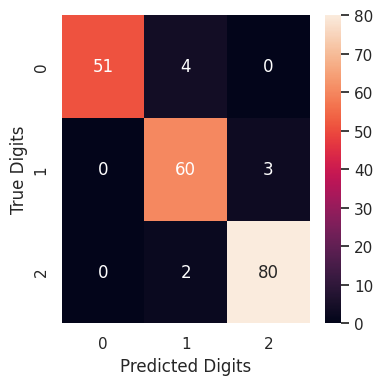

In [21]:
XGB_acc_acc = accuracy_score(y_test, pred_XGB_acc)
print("XGBClassifier_before_SMOTE accuracy is: {0:.3f}%".format(XGB_acc_acc * 100))
cm = confusion_matrix(y_test, pred_XGB_acc)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

<a name="8"></a>
<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #000000; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">- predicting the likelihood of a patient developing lung cancer  -</p>    
<p>
   
I use Optuna XGBClassifier CV before and after SMOTE, the accuracy is the same, but I prefer the situation before SMOTE, because in the confusion_matrix you can see that the actual value of Level=2 is completely predicted, after all, in medicine, the more accurate the prediction of the high level, the more important it is.

In [22]:
train_0 = train[train['Level'] == 0]
train_1 = train[train['Level'] == 1]
train_2 = train[train['Level'] == 2]

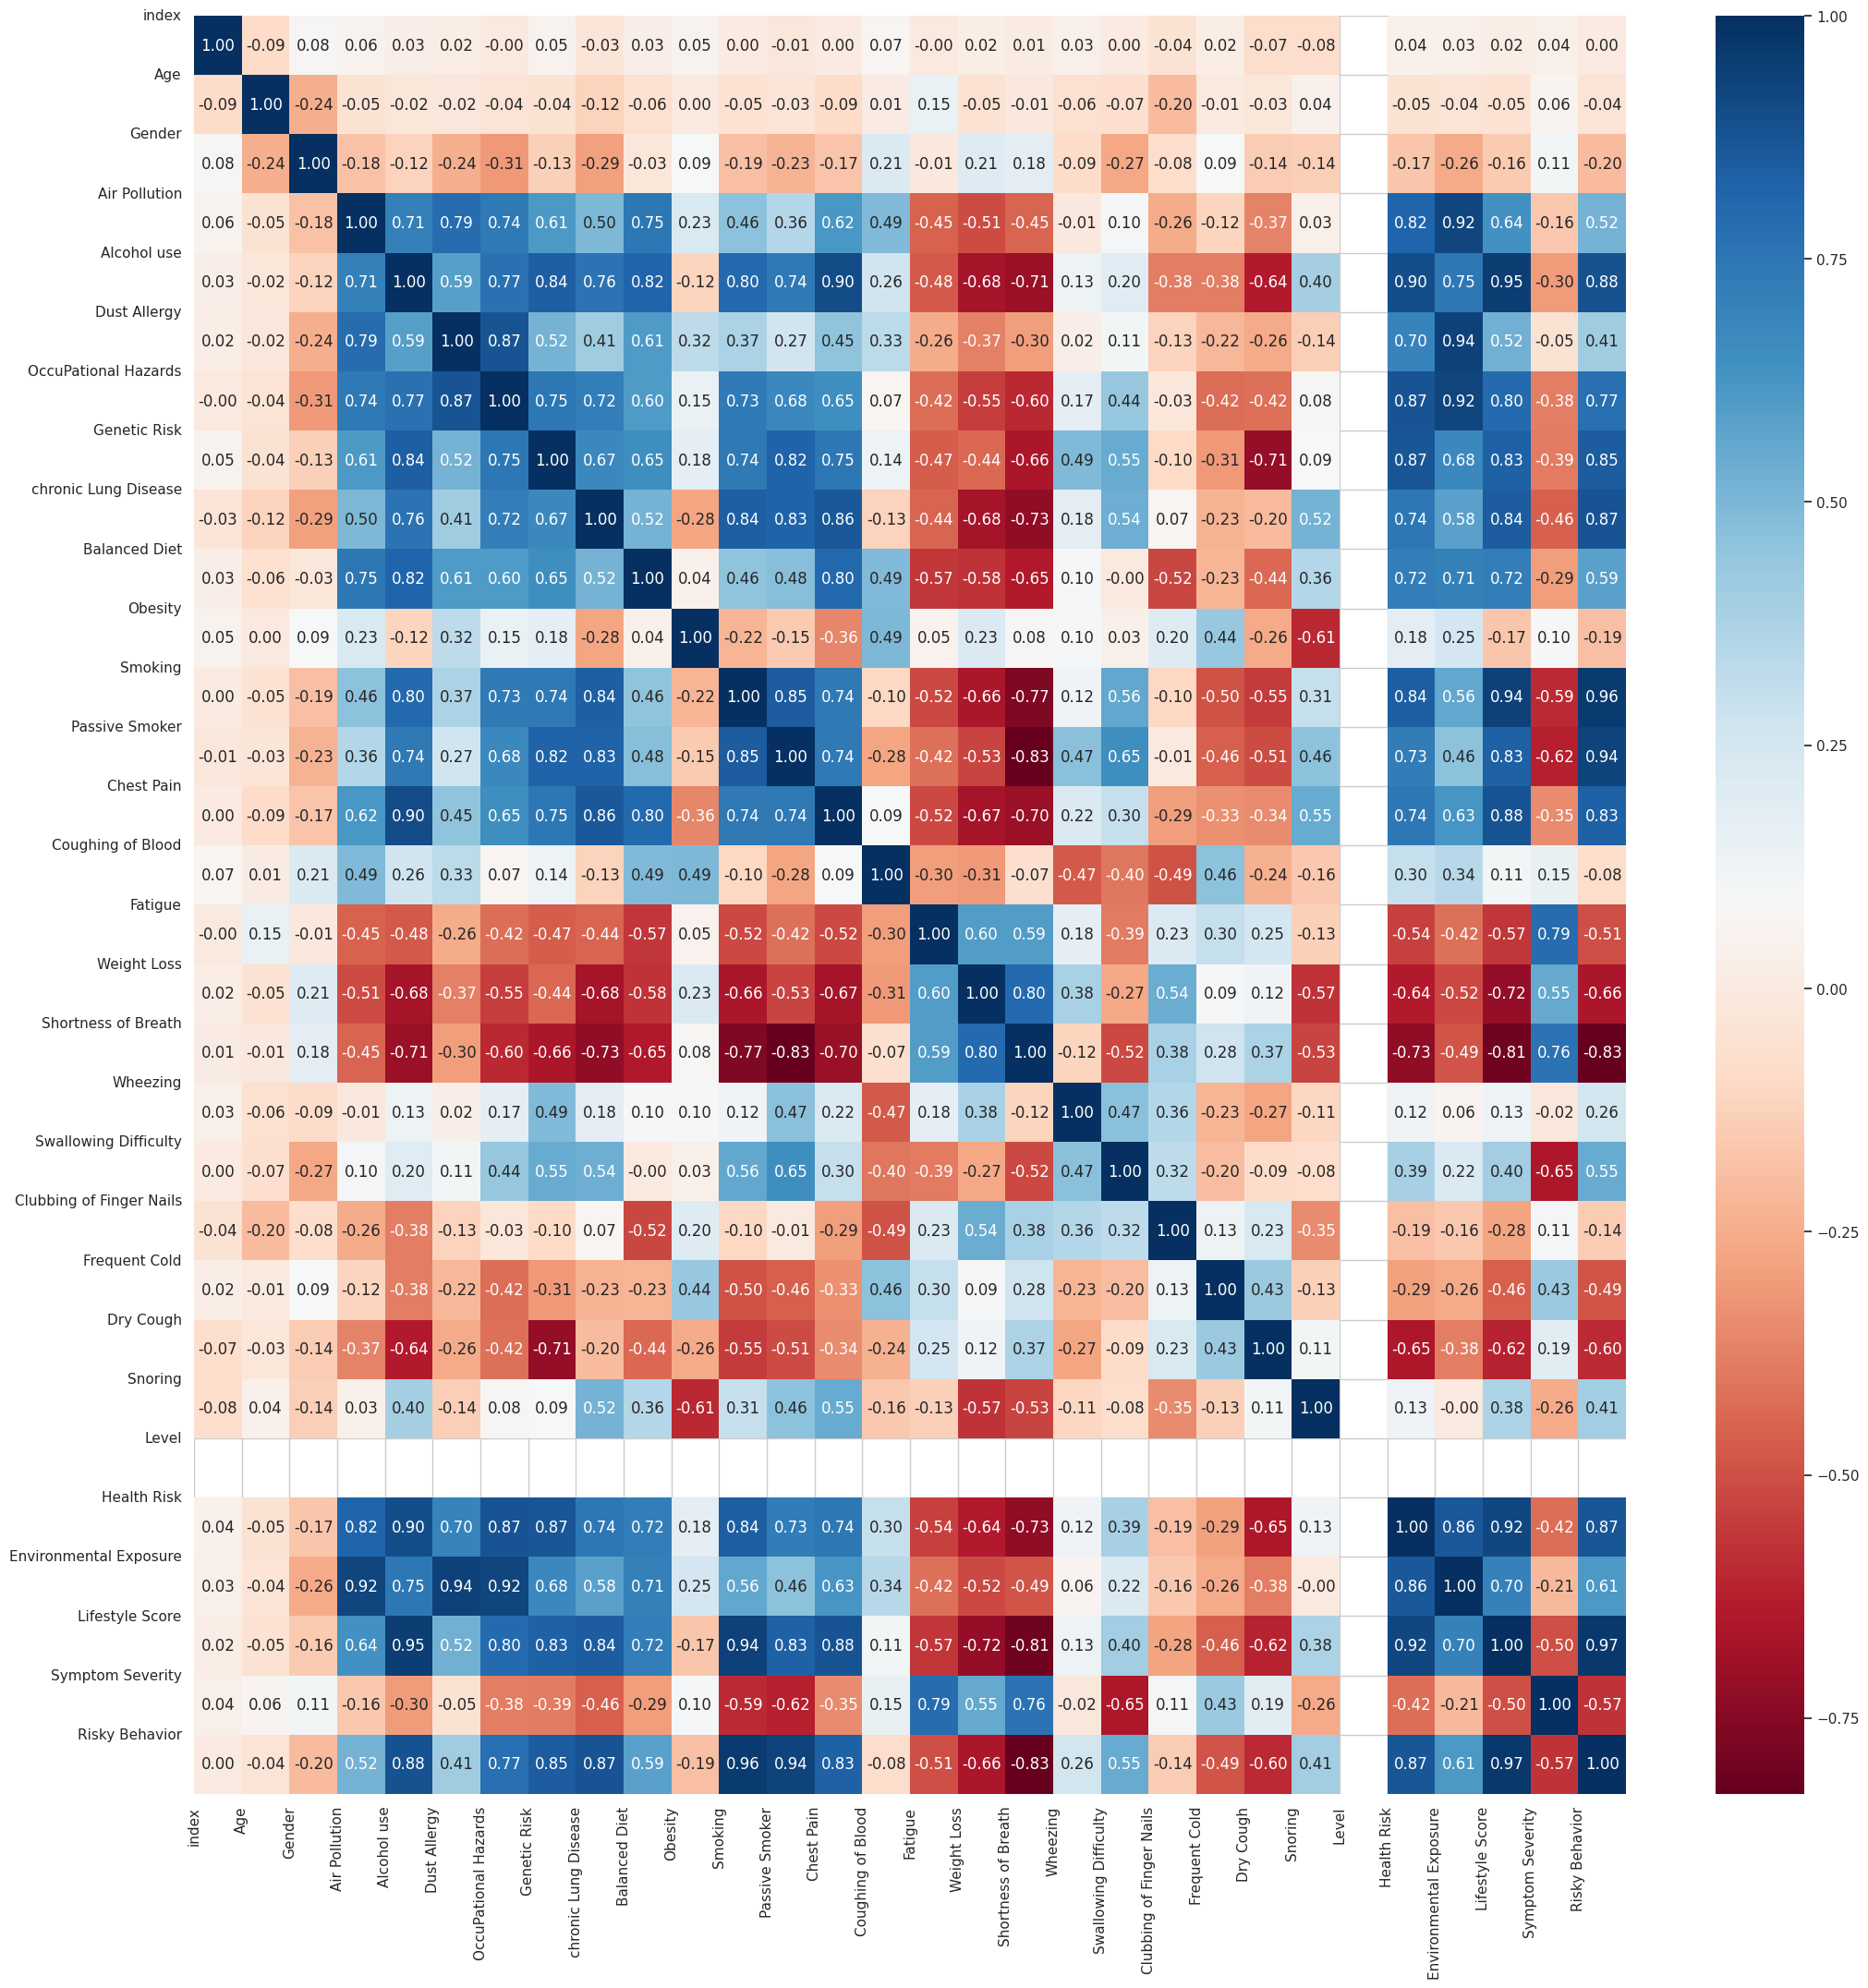

In [23]:
corr = train_2.corr(method='pearson')
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<a name="9"></a>
<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #000000; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">- dentifying risk factors for lung cancer  -</p>    
<p>

Verified on train['Level'] == 2 pearson's heat map, I think it's confirmed identifying risk factors for lung cancer is 「coughing of blood」!

XGBClassifie: 
 [0.04289609 0.01956964 0.07773569 0.03782416 0.03726761 0.04656579
 0.01604499 0.02483261 0.0462154  0.00781369 0.04955403 0.01146172
 0.08866797 0.02272945 0.03535526 0.0343716  0.04944621 0.05545788
 0.04767111 0.02247527 0.02733421 0.01576071 0.01976165 0.04024831
 0.03044036 0.         0.01283883 0.06627401 0.01338588]


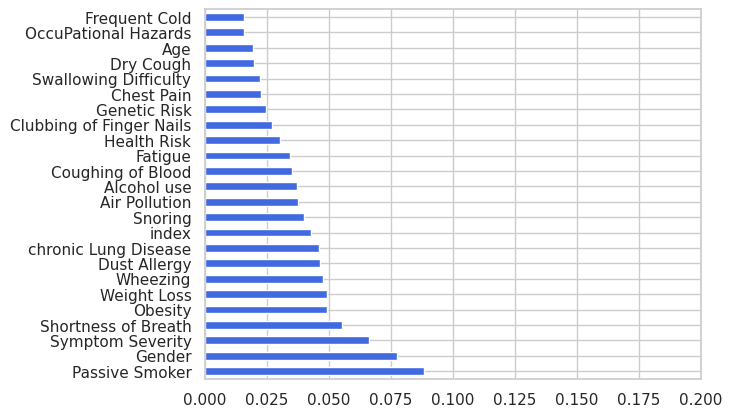

In [24]:
model = [xgb.XGBClassifier(**params_XGB_best)]

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 15]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X.columns)
    feat_importances.nlargest(24).plot(kind='barh', color='royalblue')
    plt.xlim(0, 0.2)
    plt.show()

<a name="10"></a>
<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #000000; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">- determining the most effective treatment for a patient with lung cance  -</p>    
<p>

i think on the feature_importances analysis, the highest level of importance is obesity, so I think lose weight is the most likely to affect level change, and I also think it is the most effective

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #000000; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  Upvote   -</p>    
<p>
My point of view is purely my own and does not represent the correct answer to the question!!
    I'm a beginner in the python world, not in undergrad or for work,just interest, and I'm still learning a lot of different ways to do it. I hope you'll give me your vote as well as comments to help me improve in the future, thanks!    Mr.Tao
 
    